Sales Prediction using Python

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [26]:
df = pd.read_csv("Advertising.csv")
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [19]:
X = df.drop(columns=["Sales"])
y = df["Sales"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42)
}

In [22]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))
    print(f"{name} -> MAE: {mae:.2f}, R²: {r2:.2f}")

Linear Regression -> MAE: 1.46, R²: 0.90
Decision Tree -> MAE: 0.99, R²: 0.93
Random Forest -> MAE: 0.62, R²: 0.98
Gradient Boosting -> MAE: 0.62, R²: 0.98
SVR -> MAE: 1.51, R²: 0.87
XGBoost -> MAE: 0.73, R²: 0.97


In [23]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "R²"])
best_model_name = results_df.loc[results_df["MAE"].idxmin(), "Model"]
best_model = models[best_model_name]


In [24]:
with open("best_sales_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\nBest Model: {best_model_name} saved as best_sales_model.pkl")



Best Model: Gradient Boosting saved as best_sales_model.pkl


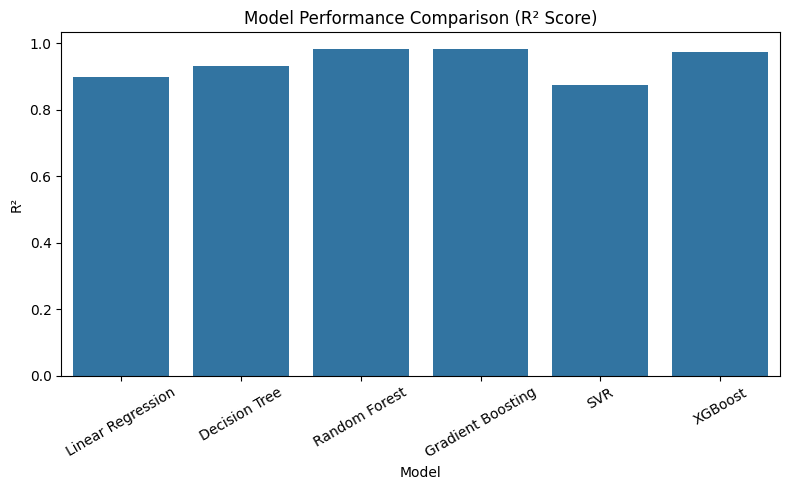

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R²", data=results_df)
plt.title("Model Performance Comparison (R² Score)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()
